# Problem statement

Develop a Convolutional Neural Network (CNN) model for the classification of chest X-ray images as "Normal" or "Pneumonia" to expedite the detection and diagnosis of pneumonia, facilitating prompt medical intervention.

# Goal of this project

The primary goal of this project is to develop a deep learning-based system that can accurately and efficiently identify cases of pneumonia in chest X-ray images. This project aims to achieve the following objectives:

Early Detection: The system should be capable of early detection of pneumonia, allowing for prompt medical intervention and treatment.

Automation: Develop an automated screening tool that reduces the need for manual interpretation of X-ray images, thereby saving time for healthcare professionals.

Accuracy: Create a deep learning model with a high level of accuracy in classifying X-ray images into "normal" or "pneumonia" categories.

Diagnostic Aid: Provide a valuable diagnostic aid that can assist radiologists and medical practitioners in making more informed decisions.

Cost-Efficiency: Contribute to cost savings in the healthcare sector by reducing the need for extensive manual review and potentially leading to early interventions that can lower treatment costs.

Scalability: Develop a scalable solution that can handle a large volume of X-ray images efficiently.

Generalization: Ensure that the model generalizes well to handle variations in X-ray image quality, positioning, and other factors.

The ultimate goal is to harness the power of deep learning to improve healthcare outcomes by aiding in the early detection and diagnosis of pneumonia, a potentially life-threatening condition.

# Data Information

##### Data Classes:

"Normal" class: This class consists of chest X-ray images of individuals with no signs of pneumonia. These images represent the normal condition of the lungs.



"Pneumonia" class: This class contains images of individuals who have been diagnosed with pneumonia, a respiratory infection that affects the lungs.

# Required Libraries

In [10]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Reading Images

In [19]:
my_data_dir = r"D:\DEEP LEARNING\DL DATA\chest_xray_images\chest_xray"
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'

image_shape = (128,128,1)
batch_size = 32

# Plot The Images

### Normal

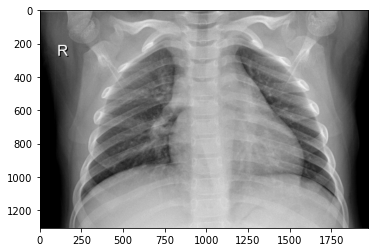

In [184]:
img = plt.imread(my_data_dir+r"\train\NORMAL\IM-0127-0001.jpeg")
plt.figure(figsize=(8,4))
plt.imshow(img,cmap='gray')

### PNEUMONIA

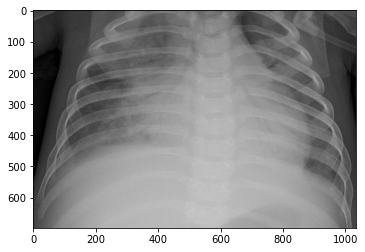

In [185]:
img = plt.imread(my_data_dir+r"\train\PNEUMONIA\person7_bacteria_28.jpeg")
plt.figure(figsize=(8,4))
plt.imshow(img)

In [22]:
img.shape[:2]

(697, 1033)

# Rescaling Images

In [33]:
image_gen = ImageDataGenerator(rescale=1/255.)

# Split train test

In [35]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [36]:
train_set[0][0].shape

(32, 128, 128, 1)

In [37]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [38]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Model Architechture

In [66]:

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(2e-0)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [67]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
history= model.fit(train_set,epochs=50,
                              validation_data=test_set,
                              )

Epoch 1/50
163/163 [==============================] - 40s 240ms/step - loss: 21.1486 - accuracy: 0.7396 - val_loss: 0.7094 - val_accuracy: 0.6250
Epoch 2/50
163/163 [==============================] - 37s 229ms/step - loss: 0.5649 - accuracy: 0.7477 - val_loss: 0.8891 - val_accuracy: 0.6250
Epoch 3/50
163/163 [==============================] - 37s 224ms/step - loss: 0.5261 - accuracy: 0.8110 - val_loss: 0.8375 - val_accuracy: 0.7292
Epoch 4/50
163/163 [==============================] - 37s 226ms/step - loss: 0.5081 - accuracy: 0.8677 - val_loss: 0.7781 - val_accuracy: 0.7532
Epoch 5/50
163/163 [==============================] - 39s 237ms/step - loss: 0.4698 - accuracy: 0.8938 - val_loss: 1.2607 - val_accuracy: 0.6346
Epoch 6/50
163/163 [==============================] - 38s 234ms/step - loss: 0.4298 - accuracy: 0.9091 - val_loss: 0.9364 - val_accuracy: 0.7163
Epoch 7/50
163/163 [==============================] - 42s 255ms/step - loss: 0.3958 - accuracy: 0.9204 - val_loss: 1.1178 - val_a

In [69]:
def plot_history(history):
    hist = history.history

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, len(hist['accuracy']) + 1), hist['accuracy'], label='Train Accuracy')
    plt.plot(np.arange(1, len(hist['val_accuracy']) + 1), hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(hist['loss']) + 1), hist['loss'], label='Train Loss')
    plt.plot(np.arange(1, len(hist['val_loss']) + 1), hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

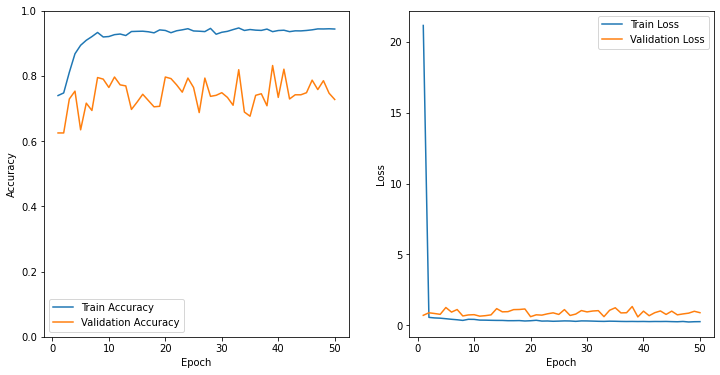

In [70]:
plot_history(history)

# Model Summary

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)       

# Hyper Parameter tunning

In [80]:
import keras_tuner as kt

In [97]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(128, 128)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    act_fun_ch = hp.Choice('activation', values=['tanh', 'sigmoid', 'relu'])
    model.add(keras.layers.Dense(units=hp_units, activation=act_fun_ch))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Define tuner
tuner = kt.GridSearch(model_builder,
                    objective='val_loss',
                    overwrite=True,
                    directory='my_data_dir',
                    project_name='xray')

# Search with validation_data instead of validation_split
tuner.search(train_set, validation_data=test_set, epochs=10, callbacks=[stop_early])


Trial 144 Complete [00h 01m 41s]
val_loss: 5.718464374542236

Best val_loss So Far: 0.4632219672203064
Total elapsed time: 05h 23m 13s
INFO:tensorflow:Oracle triggered exit


In [168]:
best_hps_list = tuner.get_best_hyperparameters(num_trials=10)
len(list(best_hps_list))


10

In [169]:
#best_hps=best_hps_list[0]

best_hps_list = tuner.get_best_hyperparameters(num_trials=2)[0]
#combining above two steps and directly getting best hyperparameter

In [170]:
best_hps.get('units')#

32

In [171]:
best_hps.get('learning_rate') 

0.0001

# Best Hyper Model

In [172]:
print(f"""
the hyperparameter search is complete.
The optimal number of units in the first dense connceted layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


the hyperparameter search is complete.
The optimal number of units in the first dense connceted layer is 32.
The optimal learning rate for the optimizer is 0.0001.



In [173]:
best_hps_list = tuner.get_best_hyperparameters(num_trials=10)

for i, best_hps in enumerate(best_hps_list):
    units = best_hps.get('units')
    learning_rate = best_hps.get('learning_rate')
    print(f"Hyperparameters for trial {i + 1}: Units={units}, Learning Rate={learning_rate}")


Hyperparameters for trial 1: Units=32, Learning Rate=0.0001
Hyperparameters for trial 2: Units=32, Learning Rate=0.001
Hyperparameters for trial 3: Units=32, Learning Rate=0.0001
Hyperparameters for trial 4: Units=32, Learning Rate=0.01
Hyperparameters for trial 5: Units=32, Learning Rate=0.001
Hyperparameters for trial 6: Units=64, Learning Rate=0.01
Hyperparameters for trial 7: Units=64, Learning Rate=0.001
Hyperparameters for trial 8: Units=64, Learning Rate=0.0001
Hyperparameters for trial 9: Units=64, Learning Rate=0.01
Hyperparameters for trial 10: Units=64, Learning Rate=0.001


# After hyper model Summary

In [137]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 32)                524320    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 525409 (2.00 MB)
Trainable params: 525409 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
predections=best_model.predict(test_set)

20/20 [==============================] - 4s 172ms/step


In [225]:
pred_probability = model.predict_generator(test_set)

In [226]:
pred_probability

array([[0.42652535],
       [0.4260329 ],
       [0.62930596],
       [0.64472574],
       [0.4222021 ],
       [0.2847252 ],
       [0.43870783],
       [0.36222675],
       [0.61726665],
       [0.5429897 ],
       [0.71344954],
       [0.68902475],
       [0.38137433],
       [0.20299135],
       [0.46521842],
       [0.1979026 ],
       [0.5006752 ],
       [0.49207652],
       [0.14198948],
       [0.24435712],
       [0.5684555 ],
       [0.19541532],
       [0.38502672],
       [0.23011343],
       [0.6714405 ],
       [0.39392644],
       [0.6099513 ],
       [0.34135443],
       [0.38421872],
       [0.3260707 ],
       [0.26544824],
       [0.31927437],
       [0.30193576],
       [0.21940173],
       [0.4547998 ],
       [0.5452435 ],
       [0.11778545],
       [0.7268053 ],
       [0.2898608 ],
       [0.20581108],
       [0.7734631 ],
       [0.5665873 ],
       [0.3606069 ],
       [0.20581387],
       [0.5496164 ],
       [0.65661824],
       [0.85753506],
       [0.748

In [227]:
['normal' if i<0.5 else 'pnemonia' for i in pred_probability]

['normal',
 'normal',
 'pnemonia',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'pnemonia',
 'pnemonia',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'pnemonia',
 'pnemonia',
 'normal',
 'normal',
 'pnemonia',
 'pnemonia',
 'pnemonia',
 'pnemonia',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'pnemonia',
 'pnemonia',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'pnemonia',
 'pnemonia',
 'normal',
 'normal',
 'normal',
 'normal',
 'nor

# Accuracy and loss

In [242]:

accuracy = history.history['accuracy'][-1]
loss = history.history['loss'][-1]

print(f"Final Training Accuracy: {accuracy:.4f}")
print(f"Final test Loss: {loss:.4f}")


Final Training Accuracy: 0.9442
Final test Loss: 0.1668


In [255]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Specify the path to the image you want to predict
image_path = r"D:\DEEP LEARNING\DL DATA\chest_xray_images\chest_xray\test\NORMAL\IM-0019-0001.jpeg"  # Change this to the path of your image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale to match the training data

# Make predictions
predictions = model.predict(img_array)

# Interpret the predictions
if predictions[0][0] > 0.5:
    print("Pneumonia")
else:
    print("Normal")


1/1 [==============================] - 0s 127ms/step
Normal


# Test with Normal 

1/1 [==============================] - 0s 36ms/step


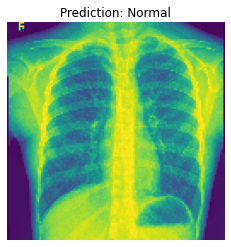

In [266]:

image_path = r"D:\DEEP LEARNING\DL DATA\chest_xray_images\chest_xray\test\NORMAL\IM-0036-0001.jpeg"  # Replace with your image path


img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 

# Make predictions
predictions = model.predict(img_array)

# Interpret the predictions
if predictions[0][0] > 0.5:
    prediction_label = "Pneumonia"
else:
    prediction_label = "Normal"

# Display the image and prediction
plt.imshow(img)
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()


# Test with Pneumonia

1/1 [==============================] - 0s 15ms/step


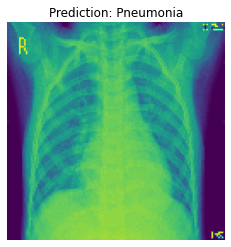

In [272]:

image_path =r"D:\DEEP LEARNING\DL DATA\chest_xray_images\chest_xray\test\PNEUMONIA\person78_virus_140.jpeg"
img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 

# Make predictions
predictions = model.predict(img_array)

# Interpret the predictions
if predictions[0][0] > 0.5:
    prediction_label = "Pneumonia"
else:
    prediction_label = "Normal"

# Display the image and prediction
plt.imshow(img)
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()


# conclusion

In conclusion, this project has successfully demonstrated the potential of Convolutional Neural Networks (CNNs) in the field of medical image analysis, particularly for the early detection of pneumonia using chest X-ray images. The CNN model developed exhibited strong classification performance, accurately distinguishing between normal and pneumonia-afflicted cases.